<a href="https://colab.research.google.com/github/LeeJeongWoon-Workout/Deep_Learning_Pytorch/blob/main/StarClassfier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as data_utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torch import nn, optim, cuda
from torch import nn
import time
%matplotlib inline

In [80]:
df=pd.read_csv('/content/Skyserver_SQL2_27_2018 6_51_39 PM.csv')

drop_list=['objid','rerun','specobjid']
df=df.drop(drop_list,axis=1)

to_normalize=['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field', 
       'redshift', 'plate', 'mjd', 'fiberid']

for each in to_normalize:
    mean, std= df[each].mean(), df[each].std()
    df.loc[:, each]=(df[each]-mean)/std

Y=df['class']
X=df.drop(['class'],axis=1)


from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression


X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)


In [82]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression(max_iter=10000)
model_lr.fit(X_train, y_train)
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))

# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      GALAXY       0.98      0.97      0.98      1026
         QSO       0.95      0.95      0.95       170
        STAR       0.97      0.99      0.98       804

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000

              precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99      1026
         QSO       0.94      0.95      0.94       170
        STAR       1.00      1.00      1.00       804

    accuracy                           0.99      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000



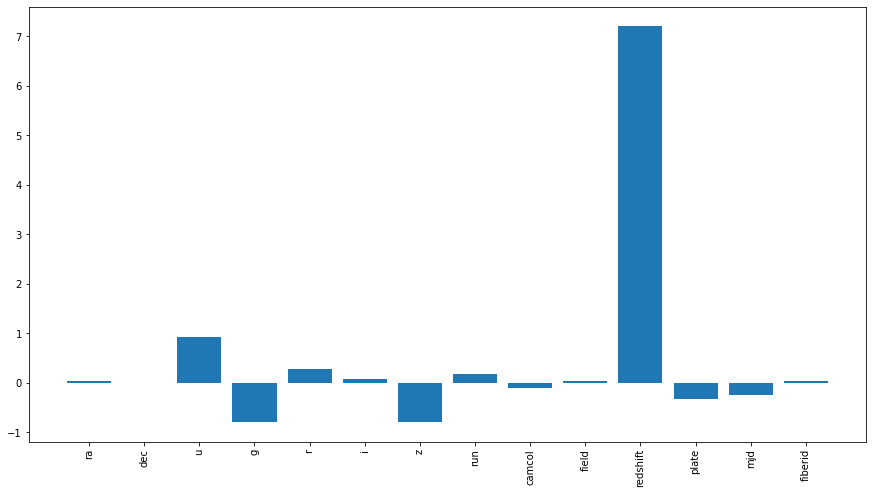

In [83]:
# Logistic Regression 모델의 coef_ 속성을 plot하기
fig = plt.figure(figsize=(15, 8))
plt.bar(X.columns, model_lr.coef_[0, :])
plt.xticks(rotation=90)
plt.show()

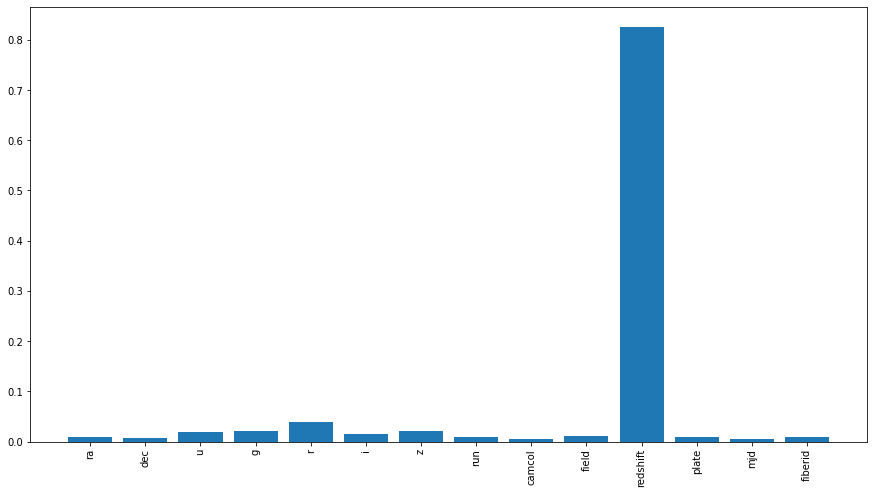

In [84]:
# XGBoost 모델의 feature_importances_ 속성을 plot하기
fig = plt.figure(figsize=(15, 8))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

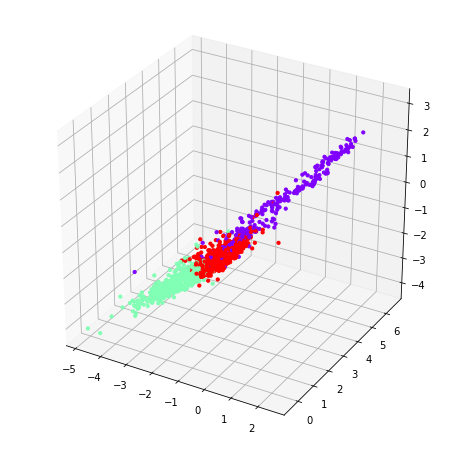

In [96]:
kMeans = KMeans(n_clusters=3)
kMeans.fit(X_train)
KMeans(algorithm='auto', copy_x =True, init='k-means++', max_iter=300,
n_clusters=3, n_init=10)

predict_cluster = kMeans.predict(X_test)


clust_df=X_test.copy()
clust_df['clust']=predict_cluster
clust_df.head()

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')

X=clust_df

ax.scatter(X.iloc[:,3],X.iloc[:,10],X.iloc[:,4],c=X.clust,s=10,cmap='rainbow',
           alpha=1)
plt.show()